In [6]:
import numpy as np
def decimal_scaling(data):
  max_value=np.max(np.abs(data))
  scaled_data=data/(10**(len(str(int(max_value))))-1)
  return scaled_data
data=np.array([25,100,1000,5000])
scaled_data=decimal_scaling(data)
print(scaled_data)

[0.00250025 0.010001   0.10001    0.50005001]


In [7]:
import numpy as np
def z_score_scaling(data):
  mean = np.mean(data)
  std_dev = np.std(data)
  standardized_data = (data - mean) / std_dev
  return standardized_data
data = np.array([25, 100, 1000, 5000])
standardized_data = z_score_scaling(data)
print(standardized_data)

[-0.73868366 -0.70190273 -0.26053158  1.70111796]


In [9]:
import numpy as np
def min_max_scaling(data, min_value=0, max_value=1):
  min_data = np.min(data)
  max_data = np.max(data)
  scaled_data = (data - min_data) / (max_data - min_data) * (max_value -min_value) + min_value
  return scaled_data
data = np.array([25, 100, 1000, 5000])
scaled_data = min_max_scaling(data)
print(scaled_data)

[0.         0.01507538 0.1959799  1.        ]


Centroids of Data Points [array([7.        , 4.33333333]), array([ 2., 10.]), array([1., 2.]), array([4.5, 8.5]), array([2., 5.])]
Centroids of Data Points [array([7.        , 4.33333333]), array([ 2., 10.]), array([1., 2.]), array([4.5, 8.5]), array([2., 5.])]
Centroids of Data Points [array([7.        , 4.33333333]), array([ 2., 10.]), array([1., 2.]), array([4.5, 8.5]), array([2., 5.])]


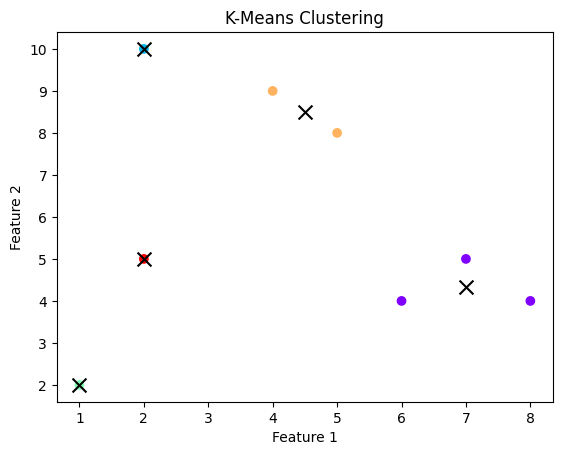

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
X = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4],[1,2],[4,9]])
K = 5
max_iterations = 100
centroids = X[np.random.choice(range(len(X)), K, replace=False)]
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1 - x2) ** 2))
for _ in range(max_iterations):
  cluster_assignments = []
  for x in X:
    distances = [euclidean_distance(x, centroid) for centroid in centroids]
    closest_cluster = np.argmin(distances)
    cluster_assignments.append(closest_cluster)
  new_centroids = []
  for cluster_id in range(K):
    cluster_points = [X[i] for i, cluster in enumerate(cluster_assignments) if cluster == cluster_id]
    if len(cluster_points) == 0:
      new_centroids.append(centroids[cluster_id])
    else:
      new_centroid = np.mean(cluster_points, axis=0)
      new_centroids.append(new_centroid)
  if np.all(np.array(centroids) == np.array(new_centroids)):
    break
  centroids = new_centroids
for i in range(3):
    print("Centroids of Data Points",centroids)
cluster_assignments = np.array(cluster_assignments)
plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments, cmap='rainbow')
plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], c='black',
marker='x', s=100)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()